In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [182]:
# Load the data
df = pd.read_csv('patient_table.csv')
df

,Unnamed: 0,diagnosis,age,sex,bmi,pt_num,loc,scope
0,0,COPD,85.0,F,17.1,130,Ar,AKGC417L
1,1,COPD,85.0,F,17.1,130,Ll,AKGC417L
2,2,COPD,85.0,F,17.1,130,Lr,AKGC417L
3,3,COPD,85.0,F,17.1,130,Pl,AKGC417L
4,4,COPD,85.0,F,17.1,130,Al,AKGC417L
...,...,...,...,...,...,...,...,...
422,422,COPD,75.0,M,27.7,185,Ar,Litt3200
423,423,COPD,75.0,M,27.7,185,Ll,Litt3200
424,424,COPD,75.0,M,27.7,185,Lr,Litt3200
425,425,COPD,75.0,M,27.7,185,Pl,Litt3200


In [186]:
# Remove duplicate rows for same patient
df = df.drop_duplicates(subset='pt_num', keep="first")
df

,Unnamed: 0,diagnosis,age,sex,bmi,pt_num,loc,scope
0,0,COPD,85.0,F,17.1,130,Ar,AKGC417L
5,5,COPD,67.0,M,29.4,195,Ar,Litt3200
13,13,URTI,3.0,M,14.9,131,Al,Meditron
14,14,COPD,71.0,M,34.0,132,Lr,LittC2SE
15,15,COPD,75.0,M,26.3,218,Al,Meditron
...,...,...,...,...,...,...,...,...
408,408,COPD,65.0,F,24.3,128,Tc,LittC2SE
409,409,URTI,6.0,M,16.2,129,Ar,Meditron
410,410,COPD,71.0,M,25.1,166,Al,Meditron
415,415,COPD,63.0,M,28.3,175,Al,Litt3200


In [188]:
# Remove rows with null values
df = df.dropna()

In [189]:
# Before beggining EDA we can already drop the columns for patient number, location of 
# reading and scope used. One can safely assume that these variables have no correlation on the diagnosis.
df = df.drop(['pt_num', 'loc','scope'], axis = 1)
df

,Unnamed: 0,diagnosis,age,sex,bmi
0,0,COPD,85.0,F,17.1
5,5,COPD,67.0,M,29.4
13,13,URTI,3.0,M,14.9
14,14,COPD,71.0,M,34.0
15,15,COPD,75.0,M,26.3
...,...,...,...,...,...
408,408,COPD,65.0,F,24.3
409,409,URTI,6.0,M,16.2
410,410,COPD,71.0,M,25.1
415,415,COPD,63.0,M,28.3


## Age and BMI
We first look at the correlation BMI and age have on the diagnosis. We consider these vairables seperately to gender because they are quantitative values rather than categorical.

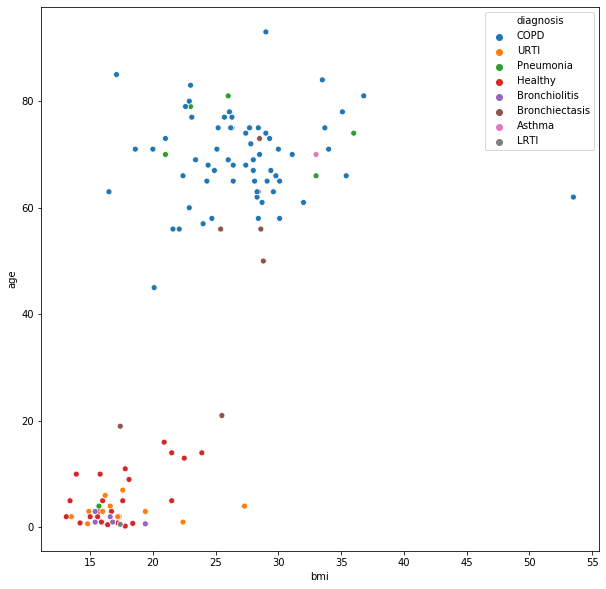

In [194]:
# A plot of BMI against age, with different coloured data points for each diagnostic group
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(df['bmi'], df['age'], hue = df['diagnosis'])
plt.legend(loc = 'upper right')

An interesting feature of this graph is that the data points are generally grouped to two clusters.

There is one cluster which consists of younger patients with lower BMI. In this group there is a larger number of patients diagnoses as healthy, URTI and Bronchiloitis.

The second cluster consists of older patients with a more varied, but higher overall BMI values. In this cluster there are more patients diagnosed as having COPD and Pneumonia.

Another point to be made is that there is a noticeabel positive correlation between age and bmi.

In [361]:
# It is perhaps useful to create a table which shows the average age and bmi of patients for each diagnostic group.
diseases = ['Asthma','Bronchiectasis','Bronchiolitis','COPD','Healthy','LRTI','Pneumonia','URTI']

average_ages = []
average_bmis = []

for d in diseases:
    sum_of_age = 0
    N = 0
    for i in df[df['diagnosis'] == d]['age']:
        sum_of_age += i
        N += 1
    average_ages.append(sum_of_age / N)
    
for d in diseases:
    sum_of_bmi = 0
    N = 0
    for i in df[df['diagnosis'] == d]['bmi']:
        sum_of_bmi += i
        N += 1
    average_bmis.append(sum_of_bmi / N)
        

pd.DataFrame({'diagnosis':diseases, 'average_age':average_ages, 'average_BMI':average_bmis})

,diagnosis,average_age,average_BMI
0,Asthma,70.000000,33.000000
1,Bronchiectasis,48.285714,26.085714
2,Bronchiolitis,1.534000,16.720000
3,COPD,69.370968,27.174194
4,Healthy,5.631667,17.341667
5,LRTI,0.580000,17.400000
6,Pneumonia,62.333333,25.783333
7,URTI,3.242727,17.809091


This table shows that there is a very significant difference between the average and BMI of the patients in different diagnostic groups, and so it is important to consider atleast on of these variables when using a model to diagnose patients. However it is also important to remeber that the BMI and age themselves may be correlated, and so it may only be that one of the two variables out of age and BMI is what correlates the diagnosis. We can use a pearson correlation coefficient (PCC) test to determine the correlation between age and BMI.

In [362]:
# Defining a fucntion to calculate the pearson correlation coefficient
def pearsons_coefficient(x,y):
    return(np.cov(x,y)[0,1]/(np.std(x)*np.std(y)))

In [363]:
pearsons_coefficient(df['age'],df['bmi'])

0.7210322639283866

A pearosn correlation coefficient value of 0.72 indicates there is a rather strong postitve correlation between age and BMI. In other words, people who are older are likely to have a higher BMI. While one might initially conlcude that you would only need to include one of these two variables for a model to diagnose patients, we must also consider the relationship between age, BMI and sex.

While one can safely assume there is no correlation between age and sex, there may be a correlation between BMI and sex. 

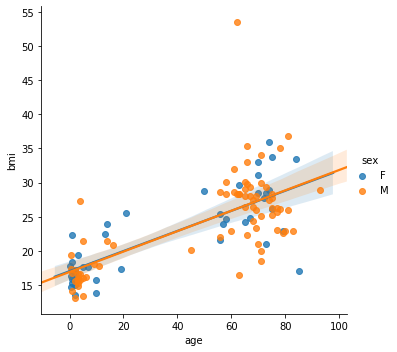

In [374]:
# A plot of age against BMI for both genders
sns.lmplot(x = 'age', y ='bmi', hue = 'sex', data = df)

From the graph above we notice the data for men and women generally overlap, and so from this evidence there appears to be little correlation between BMI and sex.

We can calculate the pearson correlation coeffecient between BMI and sex too (we must first represent the sex as binary values; 0 for male, 1 for female).

In [389]:
# Calculating PCC between sex and BMI
genders = {'M':0, 'F':1}
sexes = []
for s in df['sex']:
    sexes.append(genders[s])
pearsons_coefficient(sexes, df['bmi'])

-0.13002568117012903

A pearson correlation coeffiecient value of -0.13 indicates a very weak and nearly non-existent correlation between sex and BMI.

While this suggests that only one of the two variables is necessary for building a diagnostic model, we should also consider the correlation between age and diagnosis and BMI and diagnosis for each diagnostic group.

In [388]:
# Producing a table to display the PCC values for each diagnostic group
pcc_age = []
pcc_bmi = []

for d in diseases:
    diagnosed_cases = []
    for i in df['diagnosis']:
        if i == d:
            diagnosed_cases.append(1)
        else:
            diagnosed_cases.append(0)
    pcc_age.append(pearsons_coefficient(diagnosed_cases, df['age']))
    pcc_bmi.append(pearsons_coefficient(diagnosed_cases, df['bmi']))
    
pd.DataFrame({'diagnosis':diseases, 'PCC(age,diagnosis)':pcc_age,'PCC(BMI,diagnosis)':pcc_bmi})

,diagnosis,"PCC(age,diagnosis)","PCC(BMI,diagnosis)"
0,Asthma,0.073546,0.132363
1,Bronchiectasis,0.026435,0.093403
2,Bronchiolitis,-0.290528,-0.223802
3,COPD,0.819868,0.569510
4,Healthy,-0.632627,-0.489886
5,LRTI,-0.130472,-0.088710
6,Pneumonia,0.127742,0.075354
7,URTI,-0.425528,-0.287670


The information observed in this table is very interesting and actually displays how the pearson correlation coefficients change significantly for each diagnostic group. For some of the diseases such as Asthma, Bronchiectasis, LRTI, and Pneumonia, the PCC values for both BMI and age, are very insginficant; in other words BMI and age are not reliable varibales for diagnosing the patient. However for some of the other diagnostic groups the PCC values prove to be very significant, for example the PCC value between age and diagnosis for healthy and COPD patients. Whats interesting is that for all the diagnostic groups where significant PCC values are observed (a value further away from zero), the more significant value occurs between age and dignosis. This concludes, that from the data observed here, where age and BMI prove to be correlated to diagnosis, the correlation between age and diagnosis is stronger than the correlation between BMI and diagnosis. From this information we can finally conclude, that an optimal model for diagnosis could be built using the age data and would not necessarliy need the BMI data. It is worth noting that one may still wish to include the BMI data, as extra features can often lead to more accurate results. However extra features also increase the trainign time of our models, and in this case the increased complexity added by including the BMI data will probably not lead to a significant increase in prediciton accuracy.

## Sex
We have already demonstrated how BMI and age affect the diagnostics so now we should further explore if the sex of the patient is correlated to the diagnosis.

In [197]:
# 42 females 
len(df[df['sex'] == 'F'])

42

In [198]:
# 75 males
len(df[df['sex'] == 'M'])

75

In [237]:
# Prodcuing dictionaries that contain the diagnostic groups of each sex.
disease_count_males = {'Asthma':0, 
                       'Bronchiectasis':0,
                       'Bronchiolitis':0,
                       'COPD':0,
                       'Healthy':0,
                       'LRTI':0,
                       'Pneumonia':0,
                       'URTI':0}

disease_count_females = disease_count_males

for d in df[df['sex'] == 'M']['diagnosis']:
    disease_count_males[d] += 1
    
for d in df[df['sex'] == 'F']['diagnosis']:
    disease_count_females[d] += 1

In [238]:
disease_count_males

{'Asthma': 1,
 'Bronchiectasis': 7,
 'Bronchiolitis': 5,
 'COPD': 62,
 'Healthy': 24,
 'LRTI': 1,
 'Pneumonia': 6,
 'URTI': 11}

In [239]:
disease_count_females

{'Asthma': 1,
 'Bronchiectasis': 7,
 'Bronchiolitis': 5,
 'COPD': 62,
 'Healthy': 24,
 'LRTI': 1,
 'Pneumonia': 6,
 'URTI': 11}

In [228]:
# As the number of males and females are different it is better to represent 
# dignosis popultations as percentage of total population
disease_proportions_f = []
disease_proportions_m = []
for i in disease_count_females:
    disease_proportions_f.append(disease_count_females[i] / len(df[df['sex'] == 'F']))
for i in disease_count_males:
    disease_proportions_m.append(disease_count_males[i] / len(df[df['sex'] == 'M']))    

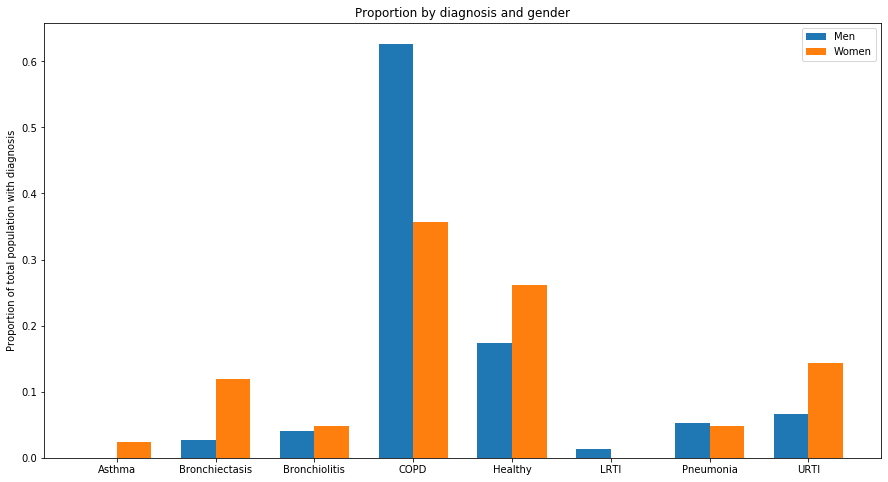

In [233]:
# Dispalying the data for diagnostic groups and sex in a bar chart.
N = len(set(df['diagnosis']))

ind = np.arange(N) 
width = 0.35
plt.figure(figsize = (15,8))
plt.bar(ind, disease_proportions_m, width, label='Men')
plt.bar(ind + width, disease_proportions_f, width,
    label='Women')

plt.ylabel('Proportion of total population with diagnosis')
plt.title('Proportion by diagnosis and gender')

plt.xticks(ind + width / 2, ('Asthma','Bronchiectasis','Bronchiolitis','COPD','Healthy','LRTI','Pneumonia','URTI'))
plt.legend(loc='best')
plt.show()


From this graoh we can see that the sex is an important factor to consider. For example the proportion of men who have COPD is almost double that of women, and the proportion of women who have URTI or Bronnchiectasis is significantly higher than that of men.

## Conclusion
In conclusion to the exploratory data anlysis, there are two variables that we would need to use in our diagnosis model: age and sex.

BMI proved not to be necessary due to a strong positive correlation between BMI and age, but with a lower correlation between diagnosis and BMI compared to the correlation between age and diagnosis.

Sex is necessary to include as the proportion of men and women in each diagnostic group varies drastically